BUSINESS UNDERSTANDING

BUSINESS PROBLEM

Creating a new movie studio

Task:
- Exploring what types of films are currently doing the best at the box office.

Objective(s)

To generate a guiding analysis to Microsoft concerning trending films.

This analysis will help the manager of the new movie studio at the Microsoft to make decision on which types of films to produce.

DATA UNDERSTANDING

Datasets that involve movie basics, movie ratings and movie gross have been used to provide basic information required to make decisions.

DATA ANALYSIS


The data collected is analised to show the most trending movie genres and their ratings

VISUALIZATION

Data cleaning and merging/joining

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/imdb.title.basics.csv.gz')
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing data
df.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [ ]:
# dropping the missing columns

df.dropna(subset=['primary_title', 'original_title', 'runtime_minutes', 'genres'], inplace=True)
print(df)

           tconst                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                    One Day Before the Rainy Season   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                           The Wandering Soap Opera   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146134  tt9916160                                         Drømmeland   
146135  tt9916170                                      The Rehearsal   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   

                                           original_title  start_year  \
0                                               Sunghursh     

In [ ]:
df1 = pd.read_csv('/content/imdb.title.ratings.csv.gz')
df1.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# checking for duplicates
df1.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing data
df1.isnull().sum()

,0
tconst,0
averagerating,0
numvotes,0


In [ ]:
df2 = pd.read_csv('/content/bom.movie_gross.csv.gz')
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
# checking for duplicates
df2.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing data
df2.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [ ]:
# dropping the missing columns
df2.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
print(df2)

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross foreign_gross  year  
0        415000000.0     652000000  2010  
1        334200000.0     691300000  2

In [ ]:
# merging the datasets
df3 = pd.merge(df, df1, on='tconst')
df3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
df3.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


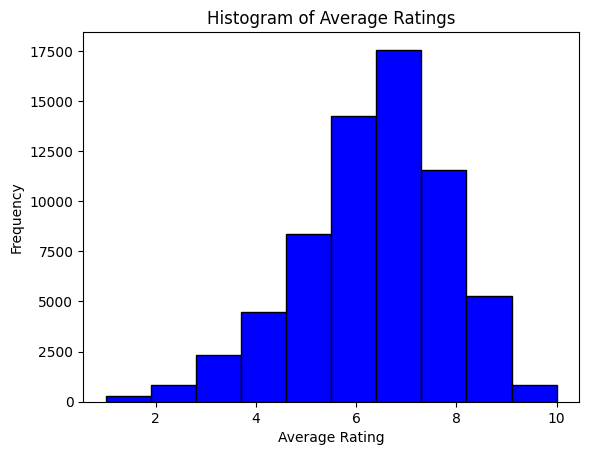

In [ ]:
# plotting histogram
plt.hist(df3['averagerating'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings')
plt.show()

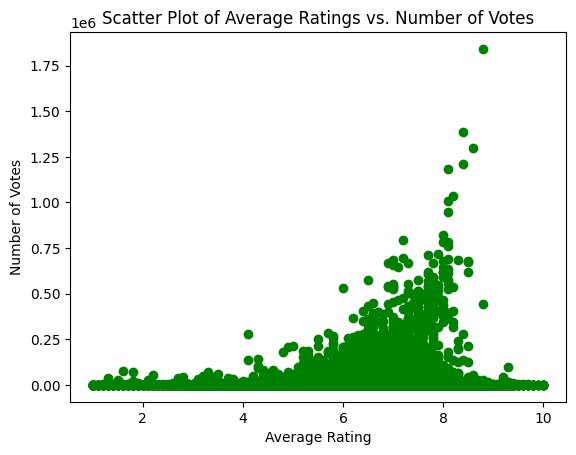

In [ ]:
# plotting a scatter diagram
plt.scatter(df3['averagerating'], df3['numvotes'], color='green')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Scatter Plot of Average Ratings vs. Number of Votes')
plt.show()

In [ ]:
# sort by most rated genre in descnding order and take top 10

most_rated_genres = df3['genres'].value_counts().head(10)
print(most_rated_genres)

genres
Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Name: count, dtype: int64


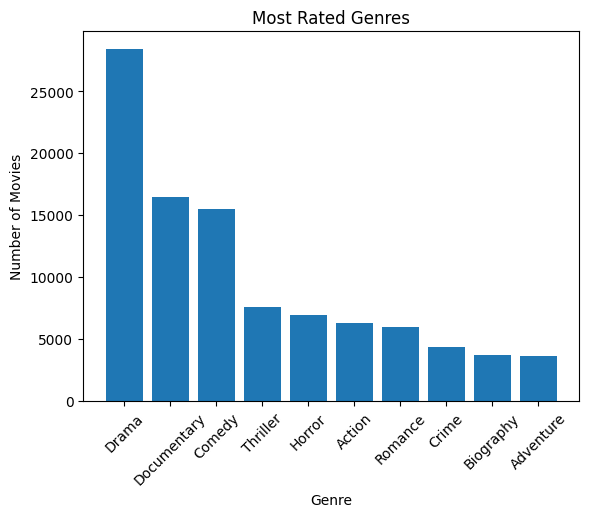

In [ ]:
# plotting a bar chart of most rated genres

plt.bar(most_rated_genres.index, most_rated_genres.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Most Rated Genres')
plt.xticks(rotation=45)
plt.show()